# Confusion matrix

A simple method which uses table to measure how well a classification model is performing.<br>
Compares the predictions made by the model with actual results.<br>
Helps us to understand where the model is making mistakes.

In [1]:
# creating a simple confusion matrix for a binary classification task - importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

In [ ]:
# creating a synthetic dataset for binary classification 
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
# splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# training a logistic regression model 
model = LogisticRegression() 
model.fit(X_train, y_train) 
# making predictions on the test set 
y_pred = model.predict(X_test)
# dispklaying the made predictions - first 5
y_pred[:5]

array([0, 1, 1, 0, 1])

In [3]:
# displaying the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[99, 12],
       [13, 76]])

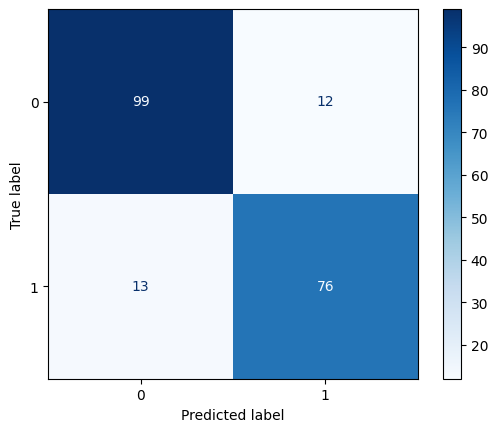

In [4]:
# viewing the confusion matrix graphically 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
disp.plot(cmap=plt.cm.Blues)
plt.show()

<b>Interpretations:</b></br> 

According to above confusion matrix:<br>

True Positives(TP's) = 99<br>
False Negatives(FN's) = 12<br>
False Positives(FP's) = 13<br>
True Negatives(TN's) = 76

In [9]:
# creating confusion matrix for multilabel classification task 
import seaborn as sb 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
# loading the titanic dataset
df = sb.load_dataset('titanic') 
# encoding input categorical variables 
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) 
df['alone'] = le.fit_transform(df['alone']) 
# selecting features and target variable 
X = df[['age','fare','sex','alone','survived']] 
Y = df['class']
# handling missing values in the 'age' column by filling with mean
X['age'] = X['age'].fillna(X['age'].mean())

C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_22556\98975989.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())


In [10]:
# dividing the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
# training a logistic regression model 
model = LogisticRegression() 
model.fit(X_train, y_train) 
# making predictions on the test set 
y_pred = model.predict(X_test) 
# displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred) 
cm

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[46,  2,  5],
       [ 2,  6, 25],
       [ 1,  3, 89]])

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

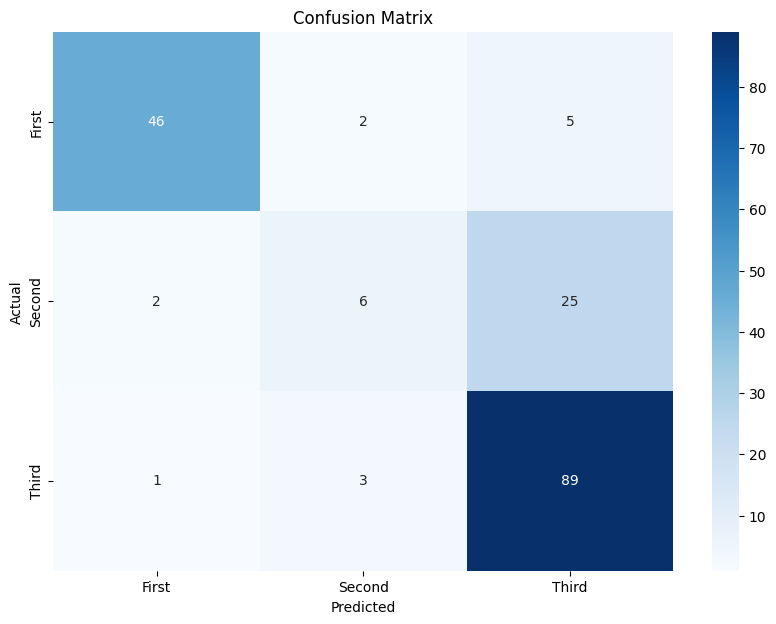

In [11]:
# viewing the confusion matrix graphically through seaborn heatmap 
plt.figure(figsize=(10,7)) 
sb.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt

<b>Interpretations:</b><br>

i. The above confusion matrix displays the true labels for each predicted labels on the test data.<br>
ii. The numeric figures determine the times the label are predicted in comparison to the actual ones.<br>
iii. The blue color in the quadrant have high contrast in places with greater numeric values and low contrast in places with lower numeric values.